In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import VoigtModel, LinearModel

In [32]:
%pylab inline
pylab.rcParams['figure.figsize'] = (21.0, 16.0)

Populating the interactive namespace from numpy and matplotlib


# Eichung
## Teil 1: Einstellen der Photomuliplier

In [28]:
cd /home/frederik/Dokumente/FP/Myonen/Messdate/photomulipier/

/home/frederik/Dokumente/FP/Myonen/Messdate/photomulipier


In [29]:
def err_coutrate(counts,time,err_time):
    '''
        Bestimmung der Fehlers der logarithmischen Countrate
    '''
    err_ct = np.sqrt(np.square(np.sqrt(counts)/time)+np.square((err_time*counts)/(err_time**2)))
    err_log_ct = err_ct/counts/time
    err_log_c = np.sqrt(counts)/counts
    return err_log_c

In [30]:
err_Zeit = [0.5,2]
err_Spannung = [1,1]
PM_list = []
PM_list.append(np.array(pd.read_csv("PM1", delim_whitespace=2)).T)
PM_list.append(np.array(pd.read_csv("PM2", delim_whitespace=2)).T)
PM_list.append(np.array(pd.read_csv("PM3-backup", delim_whitespace=2)).T)
PM_list.append(np.array(pd.read_csv("PM4", delim_whitespace=2)).T)

###PM1: Auswertung

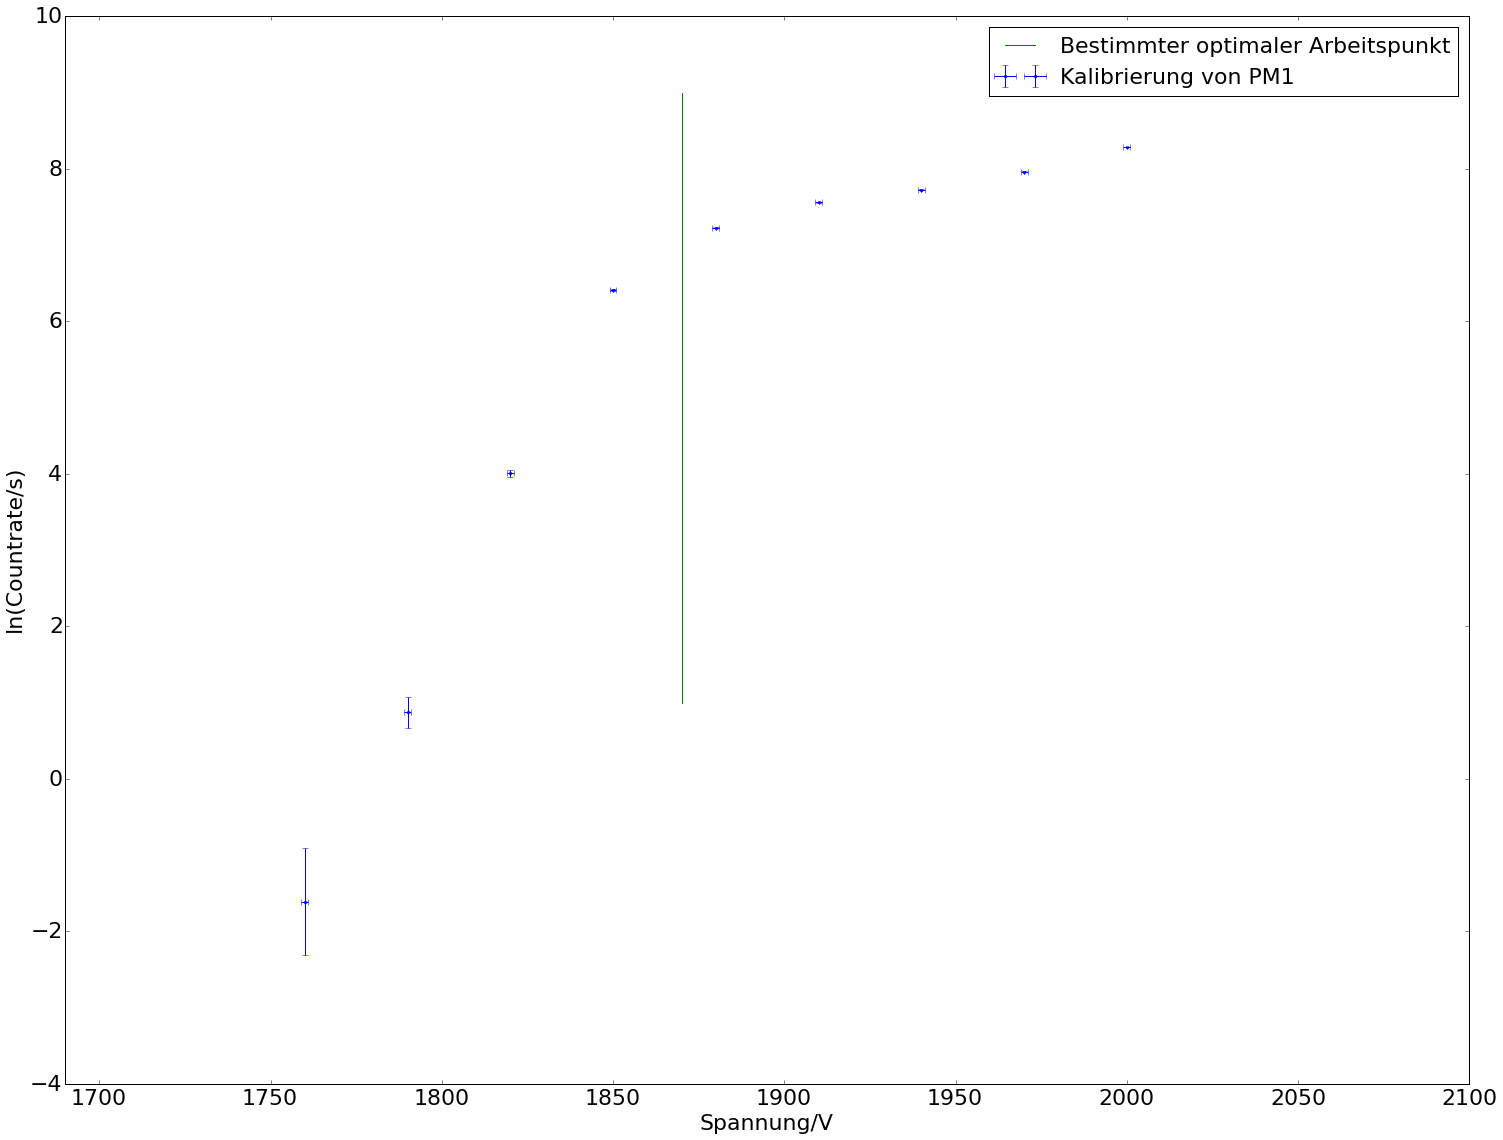

In [33]:
plt.errorbar(PM_list[0][0], np.log(PM_list[0][1]/PM_list[0][2]),err_coutrate(PM_list[0][1],PM_list[0][2],1), xerr=PM_list[0][3], fmt='. ', label="Kalibrierung von PM1")
plt.plot(np.arange(-1,10,1)/np.arange(-1,10,1)*1870,np.arange(-1,10,1), label="Bestimmter optimaler Arbeitspunkt")
plt.tick_params(labelsize=22)
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s)",fontsize=22)
plt.xlim([1690,2100])
plt.ylim([-4,10])
plt.legend(loc="best",fontsize=22)
plt.tight_layout()
plt.show()

###PM2: Auswertung

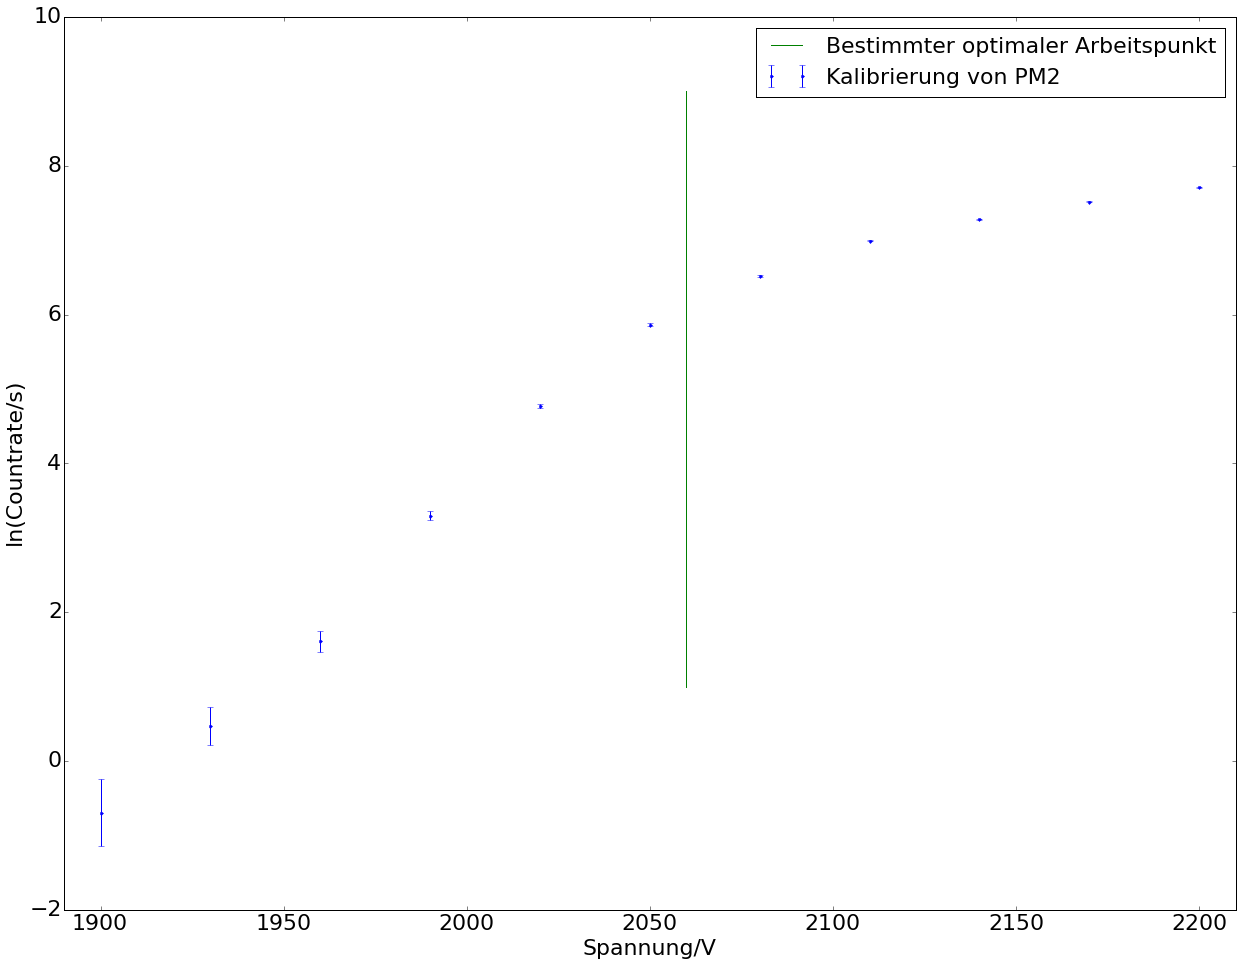

In [34]:
plt.errorbar(PM_list[1][0], np.log(PM_list[1][1]/PM_list[1][2]),err_coutrate(PM_list[1][1],PM_list[1][2],0.1), fmt='. ', label="Kalibrierung von PM2")
plt.plot(np.arange(-1,10,1)/np.arange(-1,10,1)*2060,np.arange(-1,10,1), label="Bestimmter optimaler Arbeitspunkt")
plt.tick_params(labelsize=22)
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s)",fontsize=22)
plt.xlim([1890,2210])
plt.ylim([-2,10])
plt.legend(loc="best",fontsize=22)
plt.show()

###PM3: Auswertung

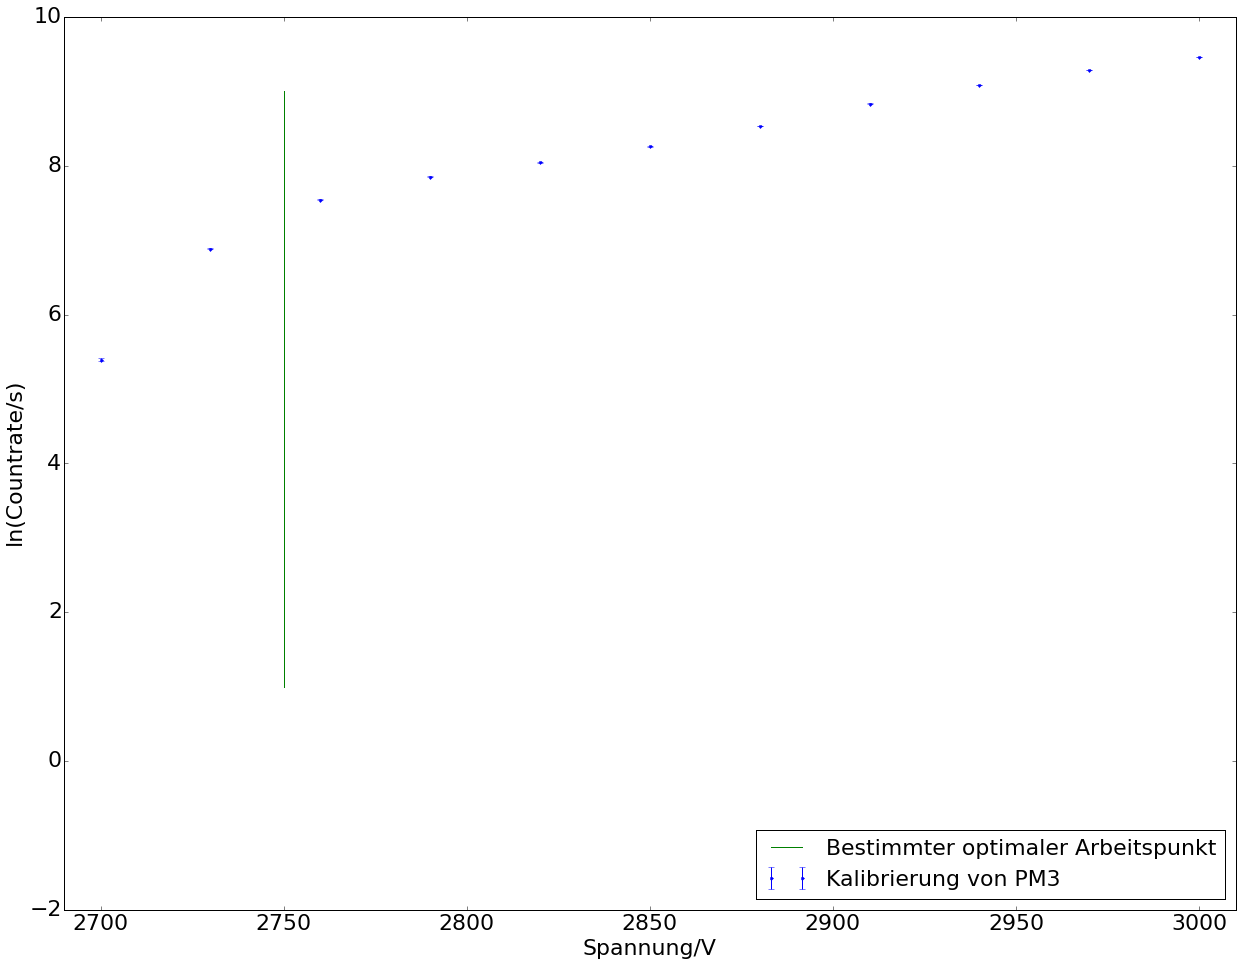

In [35]:
plt.errorbar(PM_list[2][0], np.log(PM_list[2][1]/PM_list[2][2]),err_coutrate(PM_list[2][1],PM_list[2][2],0.1), fmt='. ', label="Kalibrierung von PM3")
plt.plot(np.arange(-1,10,1)/np.arange(-1,10,1)*2750,np.arange(-1,10,1), label="Bestimmter optimaler Arbeitspunkt")
plt.tick_params(labelsize=22)
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s)",fontsize=22)
plt.xlim([2690,3010])
plt.ylim([-2,10])
plt.legend(loc="best",fontsize=22)
plt.show()

###PM4: Auswertung

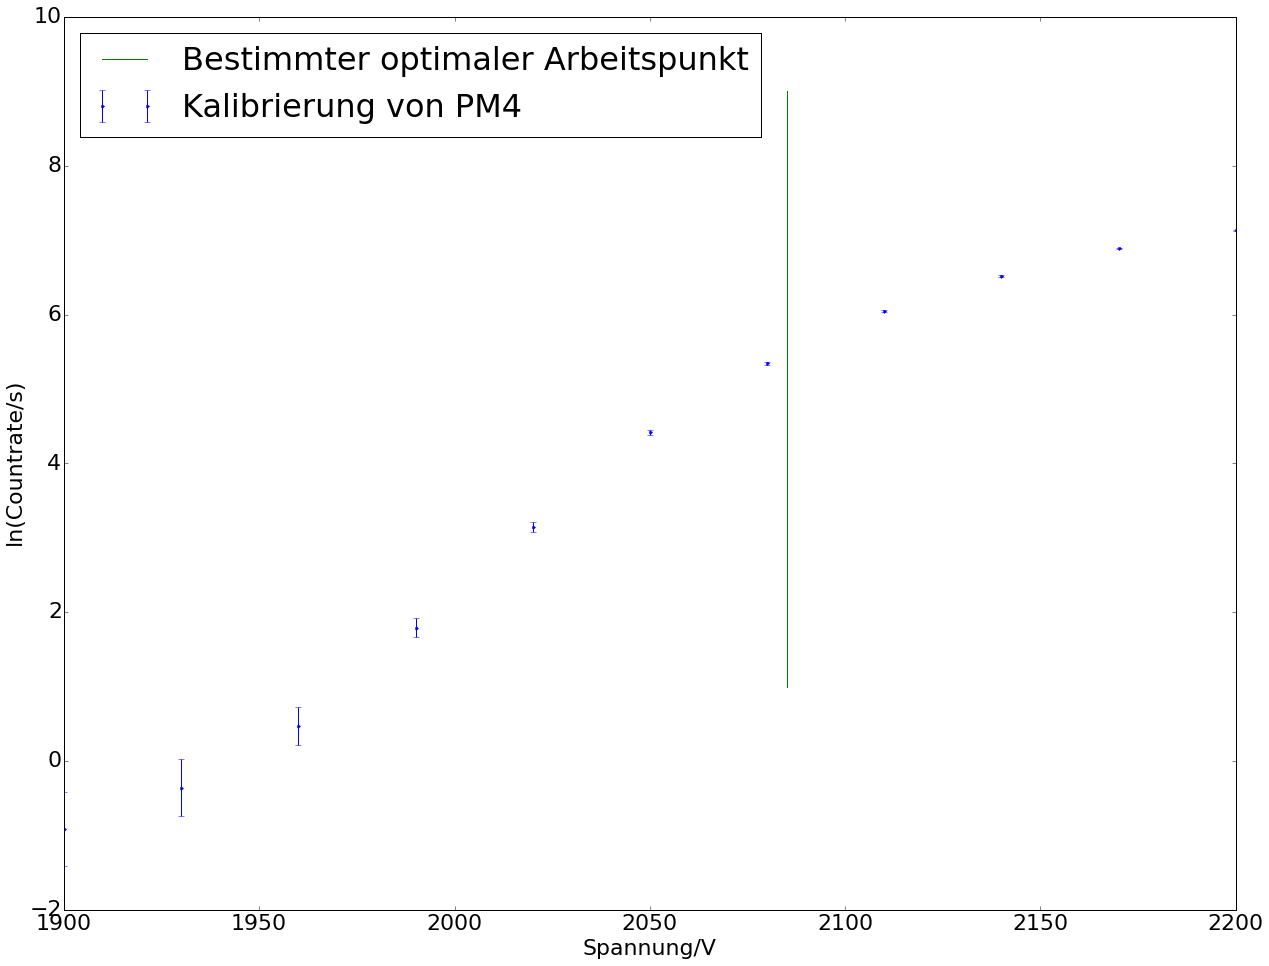

In [48]:
plt.errorbar(PM_list[3][0], np.log(PM_list[3][1]/PM_list[3][2]),err_coutrate(PM_list[3][1],PM_list[3][2],0.1), fmt='. ', label="Kalibrierung von PM4")
plt.plot(np.arange(-1,10,1)/np.arange(-1,10,1)*2085,np.arange(-1,10,1), label="Bestimmter optimaler Arbeitspunkt")
plt.tick_params(labelsize=22)
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s)",fontsize=22)
#plt.xlim([1890,2210])
plt.ylim([-2,10])
plt.legend(loc="best",fontsize=32)
plt.show()

###Ergebnisse:
Für die Photomuliplier ergaben sich die folgenden Spannungen:

####PM1: <font color="red">1870V</font>
####PM2: <font color="red">2060V</font>
####PM3: <font color="red">2750V</font>
####PM4: <font color="red">2085V</font>


##Teil2: Diskriminator einstellen

In [37]:
cd /home/frederik/Dokumente/FP/Myonen/Messdate/Diskriminator/

/home/frederik/Dokumente/FP/Myonen/Messdate/Diskriminator


In [38]:
D_list = []
D_list.append(np.array(pd.read_csv("PM1", delim_whitespace=2)).T)
D_list.append(np.array(pd.read_csv("PM2", delim_whitespace=2)).T)
D_list.append(np.array(pd.read_csv("PM3", delim_whitespace=2)).T)
D_list.append(np.array(pd.read_csv("PM4", delim_whitespace=2)).T)

###Diskriminator 1:

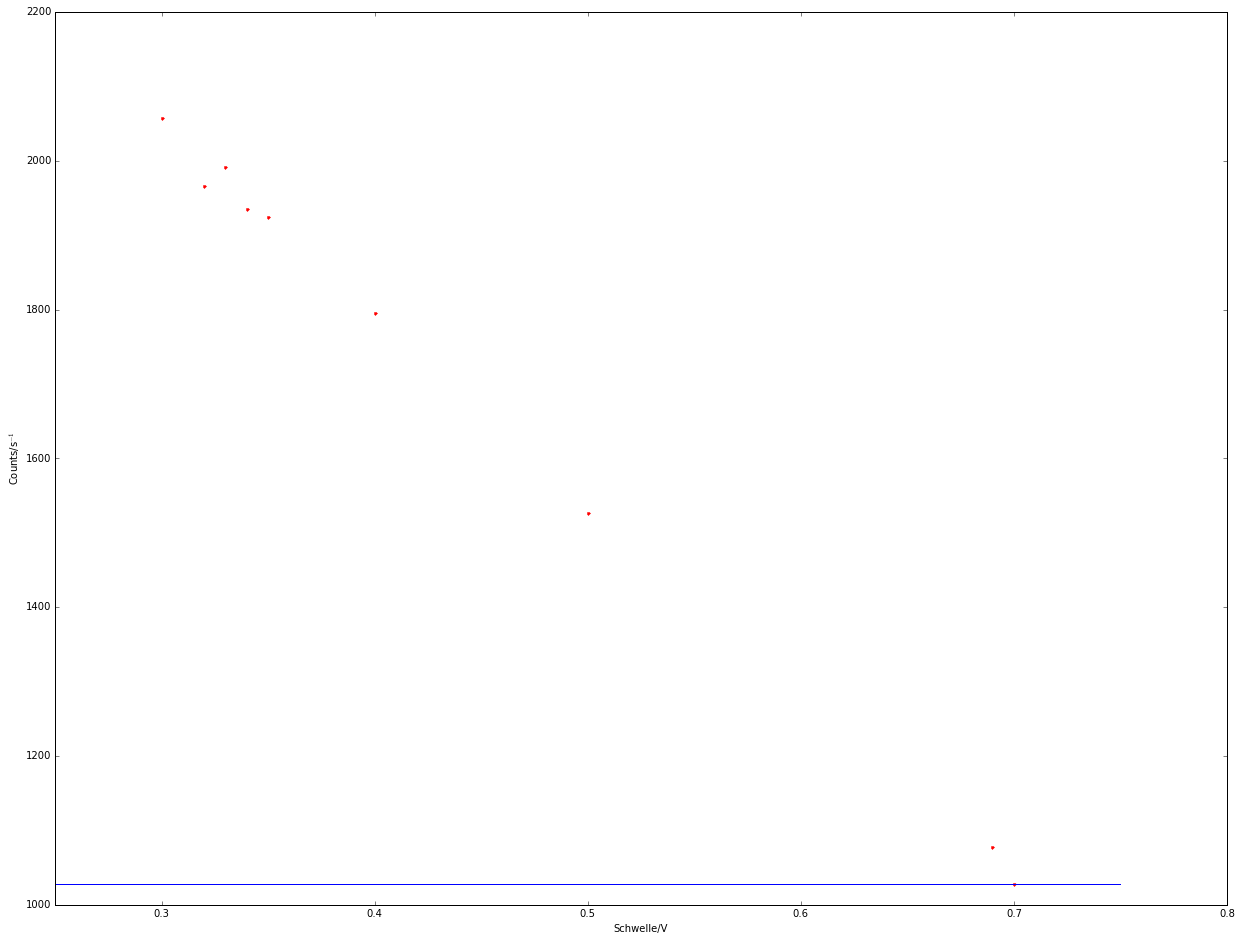

In [39]:
plt.plot(D_list[0][0], (D_list[0][1]-D_list[0][2])/10, '.r')
plt.plot(np.arange(0.25,0.8,0.1),np.arange(0.25,0.8,0.1)/np.arange(0.25,0.8,0.1)*(D_list[0][1][0]-D_list[0][2][0])/20)
plt.xlim([0.25,0.8])
plt.ylabel(r"Counts/s$^{-1}$")
plt.xlabel("Schwelle/V")
plt.show()

###Diskriminator 2

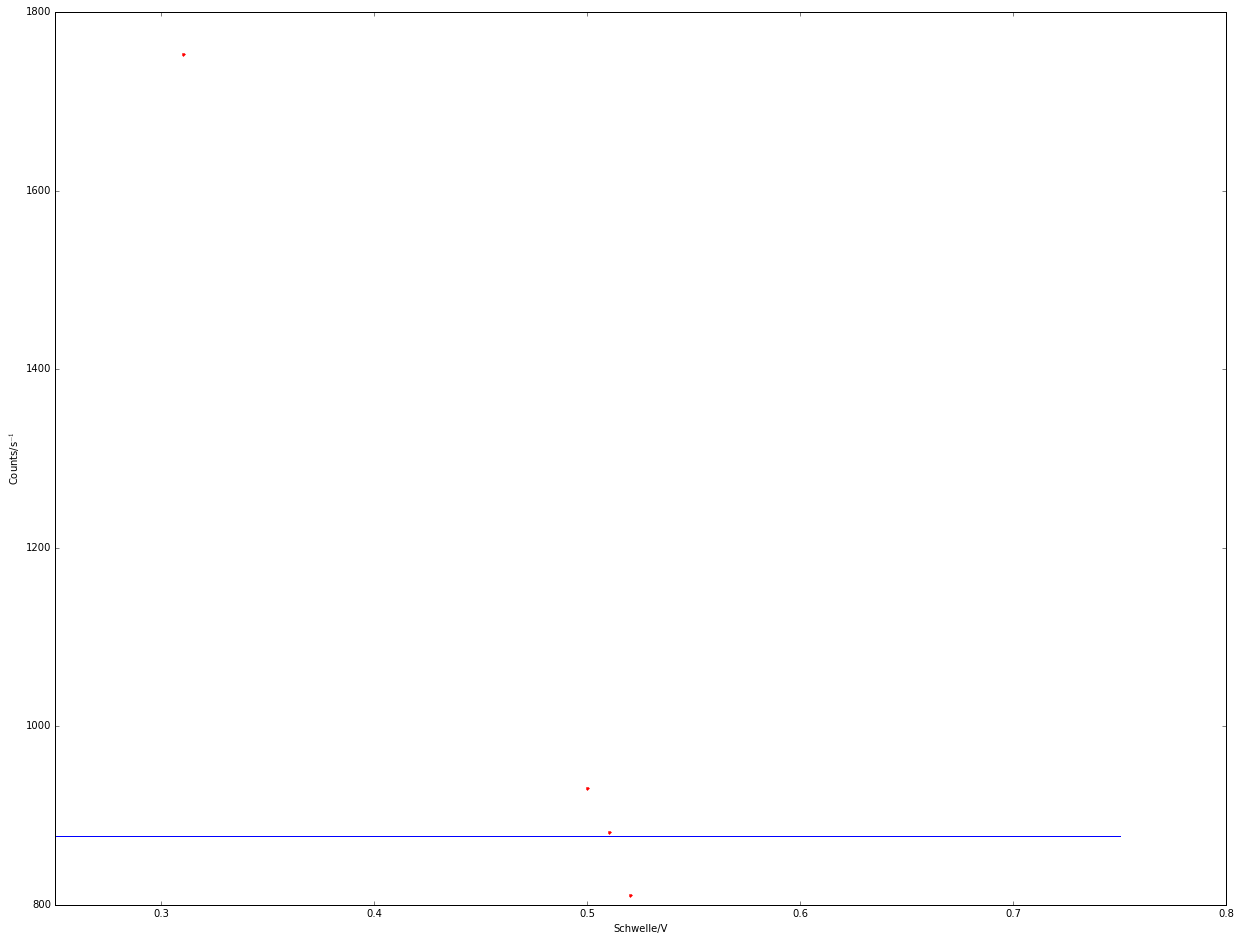

In [40]:
plt.plot(D_list[1][0], (D_list[1][1]-D_list[1][2])/10, '.r')
plt.plot(np.arange(0.25,0.8,0.1),np.arange(0.25,0.8,0.1)/np.arange(0.25,0.8,0.1)*(D_list[1][1][0]-D_list[1][2][0])/20)
plt.xlim([0.25,0.8])
plt.ylabel(r"Counts/s$^{-1}$")
plt.xlabel("Schwelle/V")
plt.show()

###Diskriminator 3

In [20]:
plt.plot(D_list[2][0], (D_list[2][1]-D_list[2][2])/10, '.r')
plt.plot(np.arange(0.25,0.8,0.1),np.arange(0.25,0.8,0.1)/np.arange(0.25,0.8,0.1)*(D_list[2][1][0]-D_list[2][2][0])/20)
plt.xlim([0.25,0.8])
plt.ylabel(r"Counts/s$^{-1}$")
plt.xlabel("Schwelle/V")
plt.show()

###Diskriminator 4

In [21]:
plt.plot(D_list[3][0], (D_list[3][1]-D_list[3][2])/10, '.r')
plt.plot(np.arange(0.25,0.6,0.1),np.arange(0.25,0.6,0.1)/np.arange(0.25,0.6,0.1)*(D_list[3][1][0]-D_list[3][2][0])/20)
plt.xlim([0.25,0.6])
plt.ylabel(r"Counts/s$^{-1}$")
plt.xlabel("Schwelle/V")
plt.show()

###Ergebnisse:
Als Schwelle für die Diskriminatoren ergaben sich die folgenden Werte:
####Diskriminator 1: <font color="red">0,70V</font>
####Diskriminator 2:  <font color="red">0.51V</font>
####Diskriminator 3:
#####Untere: <font color="red">0,41V</font>
#####Obere: <font color="red">0.52V</font>
####Diskriminator 4: <font color="red">0,49V</font>

##Teil 3: Delay

In [22]:
cd /home/arrow13/Git/FP/Myonen/Messdate/Delay/

[Errno 2] Datei oder Verzeichnis nicht gefunden: '/home/arrow13/Git/FP/Myonen/Messdate/Delay/'
/home/frederik/Dokumente/FP/Myonen/Messdate/Diskriminator


In [23]:
Delay_list = []
Delay_list.append(np.array(pd.read_csv("PM1", delim_whitespace=2)).T)
Delay_list.append(np.array(pd.read_csv("PM2", delim_whitespace=2)).T)

###Delay PM1

In [24]:
plt.plot(Delay_list[0][0], Delay_list[0][1],'.r', label="PM1", markersize = 10)
plt.xlabel("Delay/s", fontsize=22)
plt.ylabel("Counts", fontsize=22)
plt.tick_params(labelsize=22)
plt.xlim([-2,64])
plt.legend()
plt.show()

###Delay PM2

In [25]:
plt.plot(Delay_list[1][0], Delay_list[1][1],'.r', label="PM2", markersize = 10)
plt.xlabel("Delay/s", fontsize=22)
plt.ylabel("Counts", fontsize=22)
plt.tick_params(labelsize=22)
plt.xlim([-2,64])
plt.ylim([0,400])
plt.legend()
plt.show()

###Ergebnisse:
Die bestimmten Delays für PM1 und PM2 sind im folgenden zu sehen.
####Delay PM1:  <font color="red">9</font>
####Delay PM2:  <font color="red">24</font>

##Teil 4: Kanal-Zeit-Kalibrierung

In [21]:
cd /home/arrow13/Git/FP/Myonen/Messdate/Kanal_Zeit/

/home/arrow13/Git/FP/Myonen/Messdate/Kanal_Zeit


In [22]:
kanal_zeit = np.array(pd.read_csv("kalib", delim_whitespace=2)).T
print(kanal_zeit[2])

[ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]


In [23]:
mod = LinearModel()
guess = mod.guess(kanal_zeit[1],x=kanal_zeit[0])
fit = mod.fit(kanal_zeit[1], guess, x=kanal_zeit[0], weights = 1/(kanal_zeit[2]))
print(fit.fit_report(min_correl=0.25))

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 3
    # data points      = 22
    # variables        = 2
    chi-square         = 488.708
    reduced chi-square = 24.435
[[Variables]]
    slope:       0.00210633 +/- 5.57e-06 (0.26%) (init= 0.002106338)
    intercept:   0.12563062 +/- 0.019429 (15.47%) (init= 0.1256306)
[[Correlations]] (unreported correlations are <  0.250)
    C(slope, intercept)          = -0.840 


In [24]:
plt.errorbar(kanal_zeit[0], kanal_zeit[1],yerr=kanal_zeit[2]*10,fmt=". r",label="Kanal-Zeit")
plt.plot(kanal_zeit[0], fit.best_fit, '-b', label="Linearer Fit der Kanal-Zeit")
plt.tick_params(labelsize=22)
plt.xlabel("Kanal", fontsize=22)
plt.ylabel(r"Zeit/$\mu$s", fontsize=22)
#plt.xlim([-2,64])
#plt.ylim([0,400])
plt.legend(loc="best",fontsize=22)
plt.show()

In [25]:
sum(((kanal_zeit[1]-fit.best_fit)**2)/0.01**2)/20

24.435379211415341

In [26]:
sum((kanal_zeit[1]-fit.best_fit)/(0.01**2))/19

-2.1676260075764731e-05

In [27]:
x = np.arange(0,100)
y = x - np.random.randint(-5,5,size=100)
err = x-y
for i in range(len(err)):
    if err[i] == 0:
        err[i] = 1
print(err)

[ 4  1  2 -5 -4  2  4  1  4 -2  1  1 -3  2 -3  1 -2  1 -3 -2  4 -4  3  1 -5
 -1  2 -4 -1  2 -4  1 -1 -3  1  1 -2  4 -5 -2  4 -4 -1 -4  1 -2 -2 -1 -2 -4
  1 -4  2  1  1 -3 -3  1  4  1 -2 -4 -2  3  1 -2 -3  2  1 -1  1  1  1  1 -1
  3  1 -1  2  1  3  1 -1  3  3 -3 -5 -4  4 -5 -2  1 -2  1  3  3 -5 -1  2 -3]


In [28]:
mod_2 = LinearModel()
guess = mod_2.guess(y,x=x)
result = mod_2.fit(y,guess,x=x,weights=1./err**2)
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 7
    # data points      = 100
    # variables        = 2
    chi-square         = 27.684
    reduced chi-square = 0.282
[[Variables]]
    slope:       0.99971755 +/- 0.003201 (0.32%) (init= 0.9990039)
    intercept:   0.05634119 +/- 0.185658 (329.53%) (init= 0.5493069)
[[Correlations]] (unreported correlations are <  0.100)
    C(slope, intercept)          = -0.888 


In [29]:
plt.plot(x,y,'.r')
plt.plot(x,result.best_fit)
plt.show()